In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

**Analisis previo**

* Usamos la hipótesis de que la propagación del dengue puede seguir diferentes patrones entre las dos ciudades, entonces dividimos el conjunto de datos y visualizamos los datos de forma separada para cada ciudad. Elegimos la ciudad de Iquitos.

* Notemos que no tenemos ningun valor NaN en las columnas que nos interesan.

In [7]:
df1 = pd.read_csv("/content/drive/MyDrive/Organizacion de Datos/Trabajos Practicos/dengue_features_train.csv", usecols = ["city", "year", "weekofyear", "week_start_date"])
df2 = pd.read_csv("/content/drive/MyDrive/Organizacion de Datos/Trabajos Practicos/dengue_labels_train.csv")

df1["mes"] = df1["week_start_date"].map(lambda x: x.split("-")[1])
df1 = df1.drop(columns=["week_start_date"])

merge = pd.merge(df1, df2, how="right")

df_iq_heatmap = merge[merge["city"] == "iq"].pivot_table(index="year", columns="mes", values="total_cases", fill_value=0, aggfunc="sum")

Text(50.722222222222214, 0.5, 'Año')

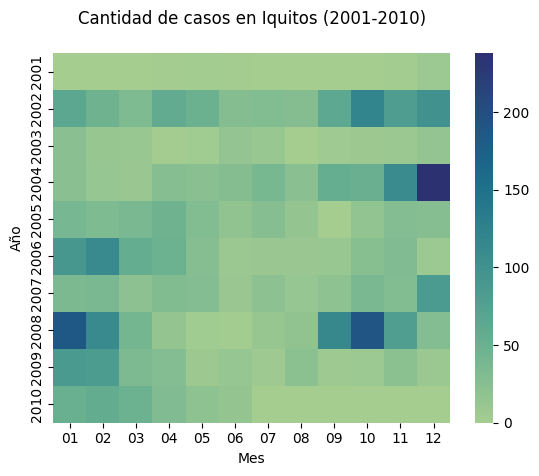

In [4]:
sns.heatmap(data=df_iq_heatmap.iloc[1:,:], cmap="crest")
plt.title('Cantidad de casos en Iquitos (2001-2010)\n')
plt.xlabel('Mes')
plt.ylabel('Año')